## ML - KNN

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
diabetes = pd.read_csv('G:\My Documents\Technical\Data Science - ML\Data Files/diabetes.csv')
print(diabetes.shape)
diabetes.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print(diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


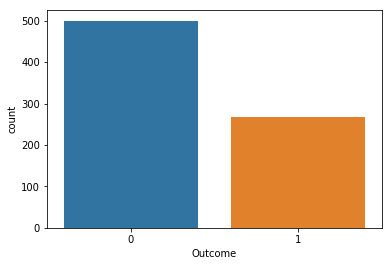

In [5]:
import seaborn as sns
sns.countplot(diabetes['Outcome'],label="Count")

In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


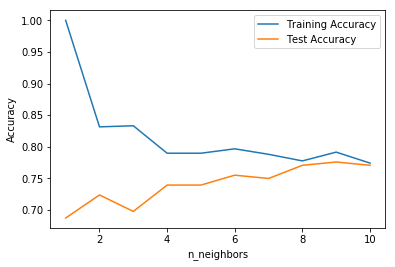

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(diabetes.loc[:,diabetes.columns != 'Outcome'],
                                                diabetes['Outcome'],stratify=diabetes['Outcome'],random_state=66)

from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1,11)
for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,Y_train)
    
    training_accuracy.append(knn.score(X_train,Y_train))
    test_accuracy.append(knn.score(X_test,Y_test))

plt.plot(neighbors_settings,training_accuracy,label="Training Accuracy")
plt.plot(neighbors_settings,test_accuracy,label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn compare model')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,Y_train)
print('Accuracyof K-NN classifier on training set: {:.2f}'.format())